**Project AirBnB Seattle**

**Initial Steps**

In [571]:
# read libraries
import pandas as pd
import numpy as np

In [573]:
# load raw data into jupyter notebook
listings_raw = pd.read_csv(my_path + "seattle/listings.csv")
print("listings rows & columns: "+ str(listings_raw.shape))
calendar_raw = pd.read_csv(my_path + "seattle/calendar.csv")
print("calendar rows & columns: "+ str(calendar_raw.shape))
reviews_raw = pd.read_csv(my_path + "seattle/reviews.csv")
print("reviews rows & columns: "+ str(reviews_raw.shape))

listings rows & columns: (3818, 92)
calendar rows & columns: (1393570, 4)
reviews rows & columns: (84849, 6)


In [574]:
# set number of columns to be displayed 
pd.set_option("display.max_columns", 92)

In [575]:
# see the first 5 entries in the listings dataset
listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [576]:
# see the first 5 entries in the calendar dataset
calendar_raw.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [577]:
# see the first 5 entries in the reviews dataset
reviews_raw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


**Preparatory Steps Listings**

In [578]:
# check for missing values in the listings dataset
df_listings = listings_raw.copy()
listings_nan = (df_listings.isnull().sum(axis=0)/df_listings.shape[0]*100).sort_values(ascending=False)
listings_nan.head(10)

license                  100.000000
square_feet               97.459403
monthly_price             60.267156
security_deposit          51.126244
weekly_price              47.380828
notes                     42.063908
neighborhood_overview     27.029859
cleaning_fee              26.977475
transit                   24.463070
host_about                22.498690
dtype: float64

In [579]:
# some columns have a lot of missing data
# I decided to drop columns that have more than 20% of missing data in their respective column
# columns that are dropped: 'license','square_feet','monthly_price','security_deposit','weekly_price','notes','neighborhood_overview','cleaning_fee','transit','host_about','host_acceptance_rate'
drop = listings_nan[listings_nan>20].index.tolist() 
df_listings.drop(columns=drop,inplace=True)

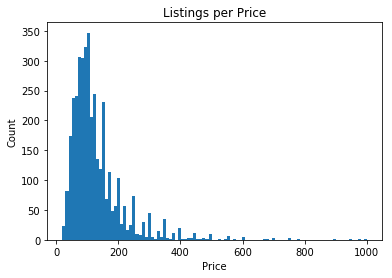

Min price  20.0
Max price:  1000.0


In [580]:
# visualize price distribution
subset_0=df_listings.copy()
subset_0["price"] = subset_0["price"].apply(lambda x: float(x[1:].replace(",","")))

ax = subset_0['price'].hist(bins=100)
plt.title('Listings per Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(False)
plt.show()

print('Min price ' , subset_0["price"].sort_values().min())
print('Max price: ' ,subset_0["price"].sort_values().max())

**Q1: Which features/amenities drive rental prices?**

https://press.airbnb.com/these-social-media-worthy-amenities-rank-highest-on-airbnb/

#1 Pool
#2 Kitchen
#3 Free Parking
#4 Pet Friendly
#5 Air Conditioning
#6 Wireless Internet
#7 Washer
#8 Jacuzzi
#9 Television
#10 Heating

In [581]:
# Create more features based on the amenities column
df_listings['TV'] = df_listings['amenities'].str.contains("tv", case=False)
df_listings['Internet'] = df_listings['amenities'].str.contains('internet|wireless', case=False)
df_listings['Parking'] = df_listings['amenities'].str.contains('parking', case=False)
df_listings['Washer'] = df_listings['amenities'].str.contains('washer', case=False)
df_listings['Dryer'] = df_listings['amenities'].str.contains('dryer', case=False)
df_listings['AirCon'] = df_listings['amenities'].str.contains('air condition|air conditioning', case=False)

In [582]:
# explore value counts for feature
df_listings['TV'].value_counts() 

True     2741
False    1077
Name: TV, dtype: int64

In [583]:
# explore value counts for feature
df_listings['Internet'].value_counts()

True     3704
False     114
Name: Internet, dtype: int64

In [584]:
# explore value counts for feature
df_listings['Parking'].value_counts()

True     2167
False    1651
Name: Parking, dtype: int64

In [585]:
# create subset for analysis
subset_1 = df_listings.copy()

subset_1["price"] = subset_1["price"].apply(lambda x: float(x[1:].replace(",","")))

amenity_price = dict()
amenity_count = dict()

# iterate through dataset and obtain amenities and price per listing
for row in subset_1.itertuples():
    amenities = row.amenities
    amenities = amenities[1:-1]
    #amenities = '[' + amenities + ']'
    amenities = amenities.split(',')
    for amenity in amenities :
        if(len(amenity)<2):
            continue
        if(amenity[0]=='"' and amenity[-1]=='"'):
            amenity = amenity[1:-1]
        try:
            amenity_count[amenity]+=1
            amenity_price[amenity].append(row.price)
        except:
            amenity_count[amenity] = 1
            amenity_price[amenity] = [row.price]

for key, value in amenity_price.items():
    amenity_price[key] = np.mean(value)

# create dataframe from results and sort by price
df_amenities = pd.DataFrame()
df_amenities['amenity'] = amenity_count.keys()
df_amenities['count'] = amenity_count.values()
df_amenities['avg_price'] = amenity_price.values()
df_amenities = df_amenities.sort_values(["avg_price"],ascending=False)
df_amenities = df_amenities.reset_index(drop=True)

In [586]:
# print top 10 amenities based on average listing price
df_amenities.sort_values(["avg_price"],ascending=False).head(10)

,amenity,count,avg_price
0,Doorman,85,200.258824
1,Pool,159,170.893082
2,Hot Tub,303,167.029703
3,Suitable for Events,209,160.574163
4,Gym,442,156.346154
5,Cable TV,1446,155.403181
6,Air Conditioning,677,153.296898
7,Indoor Fireplace,886,152.347630
8,Family/Kid Friendly,1963,150.774834
9,Pets Allowed,472,147.245763


In [587]:
# print bottom 10 amenities based on average listing price
df_amenities.sort_values(["avg_price"],ascending=False).tail(10)

,amenity,count,avg_price
31,Hangers,846,127.755319
32,Essentials,3237,127.224900
33,Dog(s),509,117.620825
34,Other pet(s),51,111.176471
35,Pets live on this property,883,109.703284
36,Cat(s),382,102.984293
37,Washer / Dryer,2,102.000000
38,Breakfast,291,95.628866
39,Smoking Allowed,82,93.134146
40,Lock on Bedroom Door,100,74.140000


In [588]:
# find position and information of amenities that Netflix listed top 10 in their article
df_amenities[df_amenities["amenity"]=="Pool"]

,amenity,count,avg_price
1,Pool,159,170.893082


In [589]:
df_amenities[df_amenities["amenity"]=="Kitchen"]

,amenity,count,avg_price
21,Kitchen,3423,131.808647


In [590]:
df_amenities[df_amenities["amenity"]=="Free Parking on Premises"]

,amenity,count,avg_price
15,Free Parking on Premises,2167,134.230734


In [591]:
df_amenities[df_amenities["amenity"]=="Air Conditioning"]

,amenity,count,avg_price
6,Air Conditioning,677,153.296898


In [592]:
df_amenities[df_amenities["amenity"]=="Wireless Internet"]

,amenity,count,avg_price
28,Wireless Internet,3667,128.47832


In [593]:
df_amenities[df_amenities["amenity"]=="Washer"]

,amenity,count,avg_price
17,Washer,2992,133.711898


In [594]:
df_amenities[df_amenities["amenity"]=="Hot Tub"]

,amenity,count,avg_price
2,Hot Tub,303,167.029703


In [595]:
df_amenities[df_amenities["amenity"]=="TV"]

,amenity,count,avg_price
12,TV,2574,140.888112


In [596]:
df_amenities[df_amenities["amenity"]=="Heating"]

,amenity,count,avg_price
29,Heating,3627,128.330025


**Q2: Seattle amongst the most expensive airbnb cities, but which parts of the cities drive that price?**

https://www.lonelyplanet.com/news/2018/07/30/most-expensive-airbnb-city/

#14: Seattle, Washington, USA ($156)

In [597]:
# create a subset for data analysis
subset_2 = df_listings.copy()
subset_2["price"] = subset_2["price"].apply(lambda x: float(x[1:].replace(",","")))

In [598]:
# explore how many listings per zipcode are in the dataset
subset_2["zipcode"].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

In [599]:
# explore the 10 most expensive zipcodes 
subset_2.groupby(["zipcode"])["price"].mean().sort_values(ascending=False).head(10)

zipcode
98134    206.600000
98199    172.393939
98101    166.721393
98119    166.377622
98121    153.785714
98109    150.247525
98116    145.348214
98136    137.909091
98112    135.437126
98104    135.221053
Name: price, dtype: float64

In [600]:
# explore the 10 least expensive zipcodes 
subset_2.groupby(["zipcode"])["price"].mean().sort_values(ascending=False).tail(10)

zipcode
98144        105.395000
98177         98.842105
98146         97.800000
98178         94.428571
98118         93.798701
98125         88.577465
98133         86.282609
98108         83.875000
98106         82.103448
99\n98122     67.000000
Name: price, dtype: float64

In [601]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [602]:
# read in shape files per zip code in seattle
temp = pd.DataFrame(subset_2.groupby(["zipcode"])["price"].mean())
temp["zipcode"]=temp.index.astype(str)
shape_path =my_path + "/Desktop/seattle/Zip_Codes.shp"
shape_file = gpd.read_file(shape_path)

In [603]:
# merge the shape file with the dataset grouped per zipcode and average price per zipcode
shape_file_merged = shape_file.merge(temp,left_on="ZIPCODE",right_on="zipcode")

/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:475: FutureWarning: 'zipcode' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = DataFrame.merge(self, *args, **kwargs)


In [604]:
# create lists in list for boxplots
data_to_plot=[]
for i in shape_file_merged["zipcode"]:
    temp = subset_2["price"][subset_2["zipcode"]==i]
    data_to_plot.append(temp)

Text(0.5,1,'Prices per Zip in Seattle')

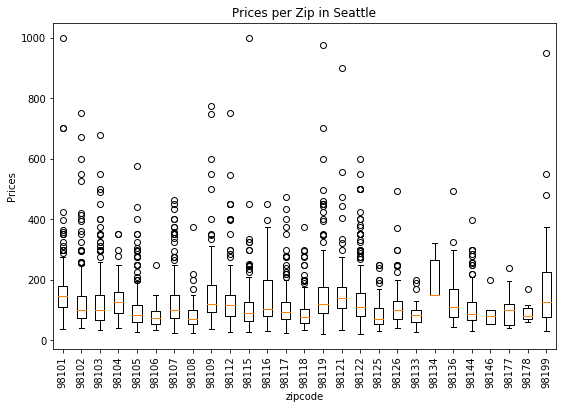

In [605]:
# create boxplots for all  zipcodes
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

plt.xlabel('zipcode')
plt.ylabel('Prices')

ax.set_xticklabels(shape_file_merged["zipcode"],rotation="vertical")

plt.title('Prices per Zip in Seattle')

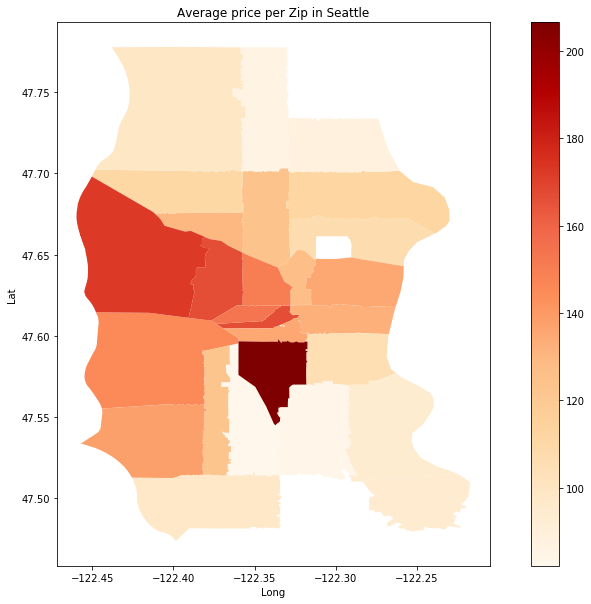

In [606]:
# create graph that indicates the price per region as a heatmap
ax = shape_file_merged.plot(column='price', cmap='OrRd', legend=True,figsize=(15,10))

plt.xlabel('Long')
plt.ylabel('Lat')
plt.title('Average price per Zip in Seattle')
plt.show()

**Q3: Seasonality for determening prices?**

https://community.withairbnb.com/t5/Everything-Else/Slow-Season/td-p/271224

In [607]:
# create subset for data analysis of question 3 and create new columns from datetime for grouping purposes
subset_3 = calendar_raw.copy()
subset_3["datetime"]=pd.to_datetime(subset_3["date"])
subset_3["calendarweek"]=subset_3["datetime"].dt.week
subset_3["month"]=subset_3["datetime"].dt.month
subset_3=subset_3.dropna(subset=['price'])

In [654]:
# plot function
def plot_function(timerange):
    plt.plot(subset_3.groupby(timerange)["price"].mean().index,subset_3.groupby(timerange)["price"].mean().values)
    plt.title('Average AirBnB Price in 2016 per '+timerange)
    plt.xlabel(timerange)
    plt.ylabel('Price in $')

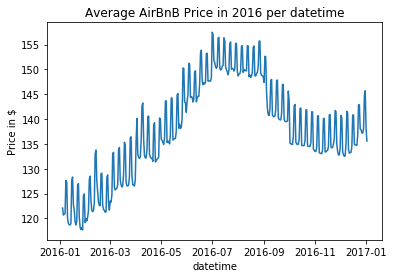

In [655]:
# observe daily patern
plot_function("datetime")

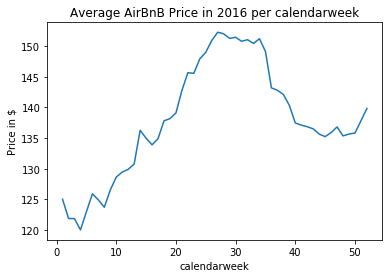

In [656]:
# observe weekly patern
plot_function("calendarweek")

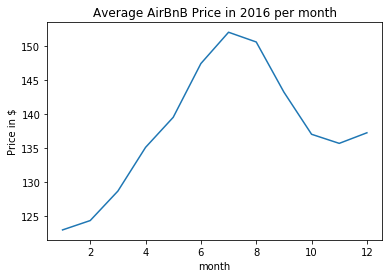

In [657]:
# observe monthly patern
plot_function("month")

In [611]:
# merge calendar data with listings data
subset_3 = subset_3.merge(df_listings[["id","zipcode"]],left_on="listing_id",right_on="id")
subset_3 = subset_3.drop("id",axis=1)

In [645]:
# create function for time groupings
def time_function(timerange):
    grouped = pd.DataFrame(subset_3.groupby(["zipcode",str(timerange)])["price"].mean())
    grouped = pd.DataFrame(grouped.to_records())
    
    data_to_plot=[]
    for i in shape_file_merged["zipcode"]:
        temp = grouped[[str(timerange),"price"]][grouped["zipcode"]==i]
        data_to_plot.append(temp)
    
    for i in range(len(data_to_plot)):
        temp=data_to_plot[i]
        timefilteredForce = plt.plot(temp[str(timerange)].values,temp["price"].values)
        plt.title('Zipcode Price per '+str(timerange))
        timefilteredForce = plt.xlabel(str(timerange))
        timefilteredForce = plt.ylabel('Price')

    plt.show()
    
    return grouped, data_to_plot

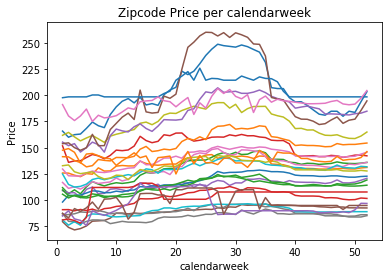

In [648]:
# see price changes throughout the week per zip code on a weekly basis
grouped_week, data_to_plot_weekly = time_function("calendarweek")

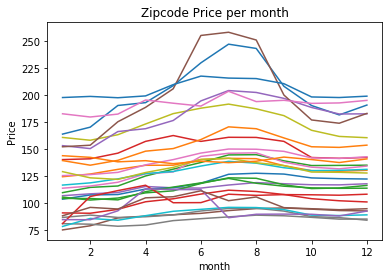

In [650]:
# see price changes throughout the week per zip code on a monthly basis
grouped_month, data_to_plot_monthly = time_function("month")

In [651]:
shape_file_merged.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,SHAPE_Leng,SHAPE_Area,geometry,price,zipcode
0,59,98101,98101,033,34632.584473,2.458772e+07,POLYGON ((-122.3300154794659 47.61843728467148...,166.721393,98101
1,60,98102,98102,033,37488.780105,4.322189e+07,POLYGON ((-122.3159301696644 47.64951306373531...,127.103245,98102
2,61,98103,98103,033,71421.212504,1.440083e+08,POLYGON ((-122.3284983624493 47.70111708599151...,124.149746,98103
3,62,98104,98104,033,43354.179793,3.880558e+07,POLYGON ((-122.3222046332107 47.61204519175887...,135.221053,98104
4,63,98105,98105,033,82483.975807,1.504377e+08,"POLYGON ((-122.309777115396 47.67381195228112,...",107.111111,98105


In [652]:
# define new subset for highest season (July)
average_high_season = grouped_month[grouped_month["month"]==7]

In [662]:
# merge highest season with general data
season_comparison = average_high_season.merge(shape_file_merged,left_on="zipcode",right_on="ZIPCODE")
season_comparison = season_comparison[["zipcode_x","price_x","price_y","geometry"]]
season_comparison.columns=["zipcode","price_high_season","price_average","geometry"]

In [663]:
# calculate price differences between average and high season, both absolute and relative
season_comparison["price_difference"] = season_comparison["price_high_season"] - season_comparison["price_average"]
season_comparison["price_difference_relative"] = (season_comparison["price_high_season"]/season_comparison["price_average"]-1)

In [665]:
# define plot function for difference comparison
def season_comparison_f(how):
    
    if how == "Absolute":
        how_feature = "price_difference"
    elif how == "Relative":
        how_feature = "price_difference_relative"
        
    plt.bar(season_comparison["zipcode"],season_comparison[how_feature])

    plt.xlabel('zipcode')
    plt.ylabel(how+' Price Difference')

    plt.xticks(rotation=90)

    plt.title('Prices per Zip in Seattle')

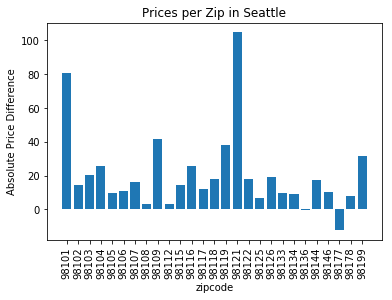

In [666]:
# plot absolute differences between average prices and high season prices per zipcode
season_comparison_f("Absolute")

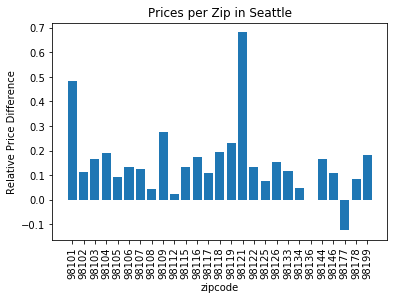

In [667]:
# plot relative differences between average prices and high season prices per zipcode
season_comparison_f("Relative")

In [625]:
# import us holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
calendar()

In [626]:
# define time range matching this data set
dr = pd.date_range(start='2016-01-01', end='2016-12-31')
holidays = calendar().holidays(start=dr.min(), end=dr.max())

In [637]:
# group data per holiday date
grouped_date = pd.DataFrame(subset_3.groupby(["date","month"])["price"].mean())
grouped_date = pd.DataFrame(grouped_date.to_records())
grouped_date["date"] = pd.to_datetime(grouped_date["date"])
grouped_date_holidays = grouped_date[grouped_date["date"].isin(holidays)]

In [638]:
# merge grouped data per holiday date with average price of month
grouped_date_holidays = grouped_date_holidays.merge(pd.DataFrame(grouped_month.groupby("month")["price"].mean()),on="month")
grouped_date_holidays= grouped_date_holidays.drop(columns="month")
grouped_date_holidays.columns=["day of holiday","price holiday","average price"]

In [642]:
# compare average price of month with holiday price
from sklearn.metrics import mean_absolute_error
mean_absolute_error(grouped_date_holidays["price holiday"],grouped_date_holidays["average price"])

7.3154089892783